## Visualize results NARMAX experiments

In [86]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

In [4]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

In [5]:
T_trn = length(4.05*1e4:131072);

### Root Mean Squared Error

In [87]:
model_orders = [4,7,10,13]
which_orders = [1,2,3,4]
num_orders = length(which_orders)

RMS_sim_FEM = zeros(num_orders,)
RMS_prd_FEM = zeros(num_orders,)
RMS_sim_RLS = zeros(num_orders,)
RMS_prd_RLS = zeros(num_orders,)
RMS_sim_ILS = zeros(num_orders,)
RMS_prd_ILS = zeros(num_orders,)

for (ii,order) in enumerate(model_orders)

    RMS_prd_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_prd_FEM")
    RMS_sim_FEM[ii] = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "RMS_sim_FEM")

    RMS_prd_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_prd_RLS")
    RMS_sim_RLS[ii] = load("results/silverbox-NARMAX-RLS_order"*string(order)*"_results.jld", "RMS_sim_RLS")

    ILS_data = matread("results/silverbox-NARMAX-ILS_order"*string(order)*"_results.mat")
    RMS_prd_ILS[ii] = ILS_data["RMS_prd_ILS"]
    RMS_sim_ILS[ii] = ILS_data["RMS_sim_ILS"]

end    

In [88]:
[RMS_prd_ILS RMS_prd_RLS RMS_prd_FEM] .* 1e3

4×3 Array{Float64,2}:
 129.4       19.8221   20.3333
   0.121845   1.35292   0.324636
   0.221897   1.70344   0.141363
   0.149556   2.0892    0.116209

In [89]:
[RMS_sim_ILS RMS_sim_RLS RMS_sim_FEM] .* 1e3

4×3 Array{Float64,2}:
  49.4815    54.1056  49.4067
   0.648421  54.1049   5.87035
 NaN         54.1042   0.700819
   0.579524  54.1035   0.421014

### Free Energy

In [97]:
T_trn+4

90577

In [101]:
# Load FE arrays
model_orders = [4,7,10,13]
num_orders = length(model_orders)

FE_m = zeros(90500, num_orders)

for (ii,order) in enumerate(model_orders)
    
    Fq = load("results/silverbox-NARMAX-FEM_order"*string(order)*"_results.jld", "Fq")
    FE_m[:,ii] = Fq[end-90500+1:end,end]
    
end

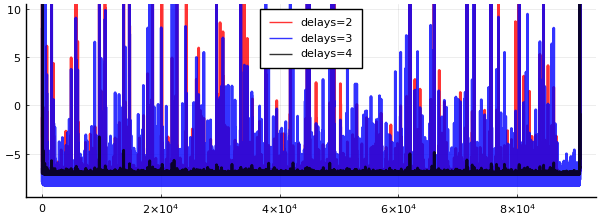

In [102]:
# p10 = plot(1:T_trn, FE_m[:,1], label="delays=1", alpha=0.3, color="green", xlabel="time [k]", ylabel=L"Free energy $F_k[q]$")
p10 = plot(1:T_trn, FE_m[:,2], label="delays=2", linewidth=2,  alpha=0.8, color="red", ylims=[-9,10])
plot!(1:T_trn, FE_m[:,3], label="delays=3", linewidth=2, alpha=0.8, color="blue")
plot!(1:T_trn, FE_m[:,4], label="delays=4", linewidth=2, alpha=0.8, color="black", size=(600,220))

In [103]:
savefig(p10, "figures/Fq-comparisons.png")

In [104]:
FE_m[end,:]

4-element Array{Float64,1}:
 -4.2997910020186225
 -7.139435511769079
 -8.123241659186192
 -7.116767440148465

In [107]:
mean(FE_m, dims=1)

1×4 Array{Float64,2}:
 32.6391  -6.97099  -7.65065  -7.0886

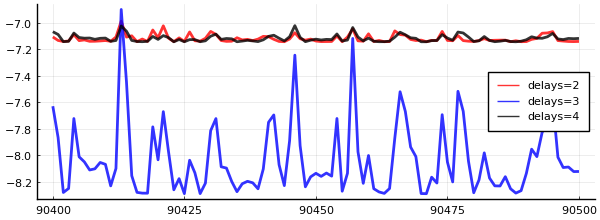

In [109]:
T = size(FE_m,1)
zoom_t = T-100:T

# p10 = plot(1:T_trn, FE_m[:,1], label="delays=1", alpha=0.3, color="green", xlabel="time [k]", ylabel=L"Free energy $F_k[q]$")
p10 = plot(zoom_t, FE_m[zoom_t,2], label="delays=2", linewidth=2,  alpha=0.8, color="red")
plot!(zoom_t, FE_m[zoom_t,3], label="delays=3", linewidth=2, alpha=0.8, color="blue")
plot!(zoom_t, FE_m[zoom_t,4], label="delays=4", linewidth=2, alpha=0.8, color="black", size=(600,220))